<a href="https://colab.research.google.com/github/chitoge729/TE_DSBDA/blob/main/DSBDA_Asgn_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")

In [3]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [5]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [7]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

<ipython-input-11-d83cb3da516e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['medv'])


<Axes: xlabel='medv', ylabel='Density'>

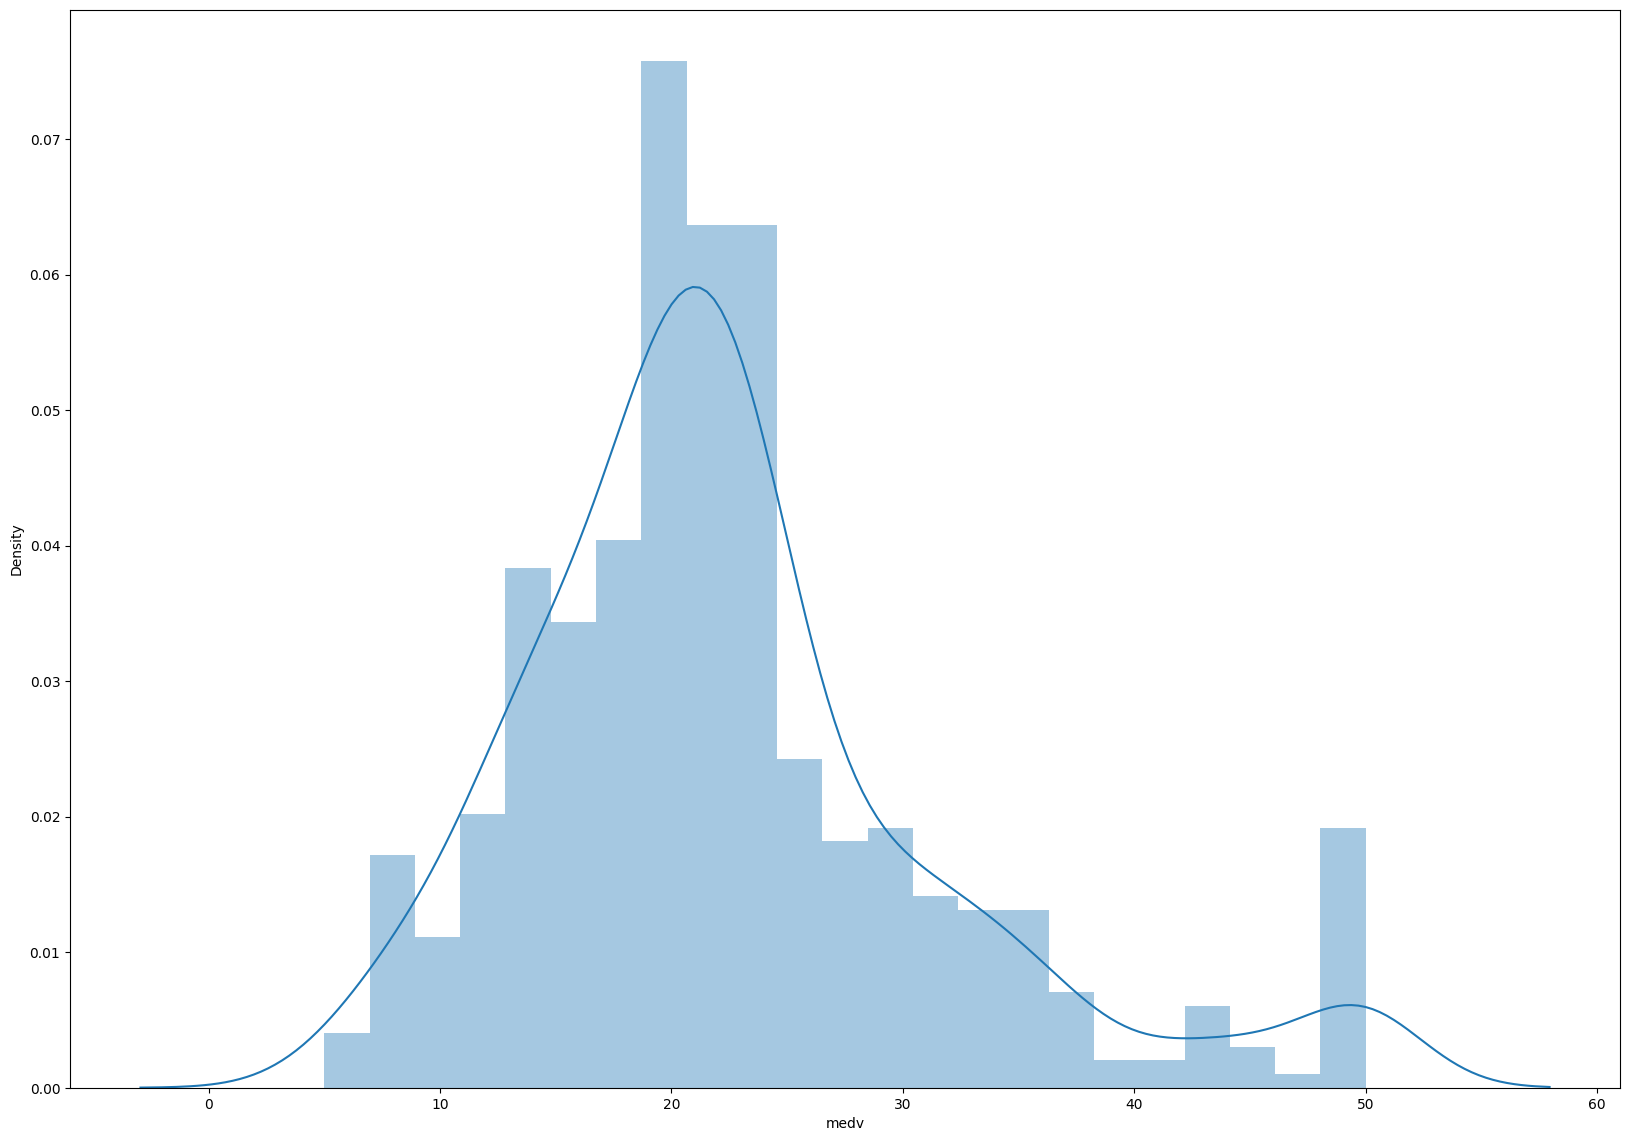

In [11]:
plt.figure(figsize = (20,14))
sns.distplot(df['medv'])

<Axes: >

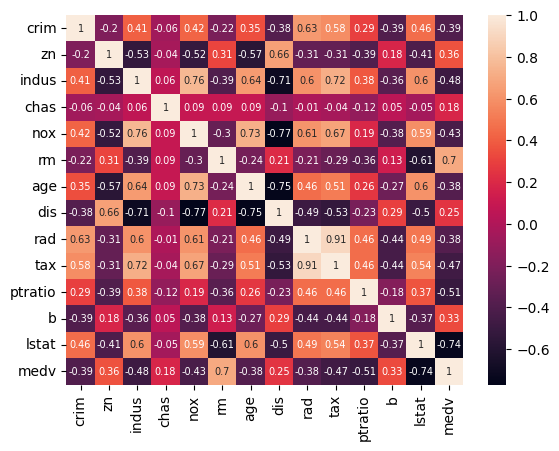

In [12]:
correlation_matrix = df.corr().round(2)
sns.heatmap(data = correlation_matrix, annot = True, annot_kws = {'size' : 7})

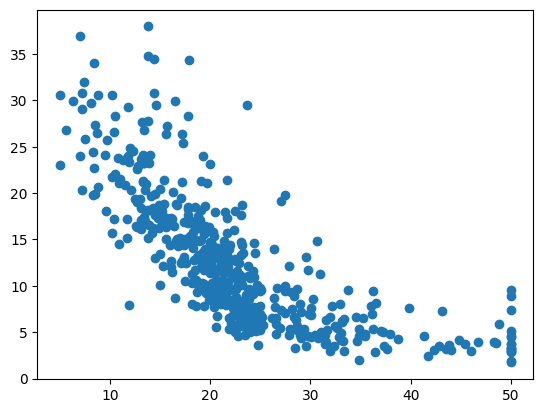

In [13]:
plt.scatter(df['medv'], df['lstat'])

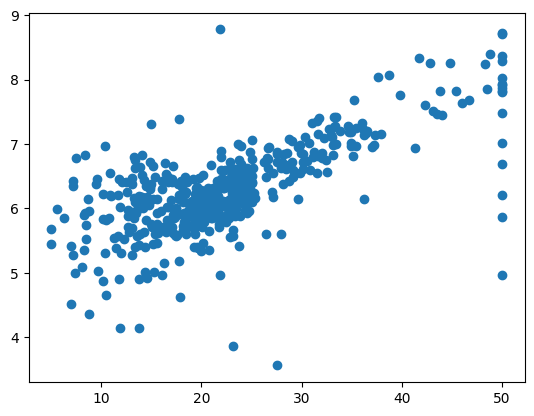

In [14]:
plt.scatter(df['medv'], df['rm'])

<Figure size 2000x1400 with 0 Axes>

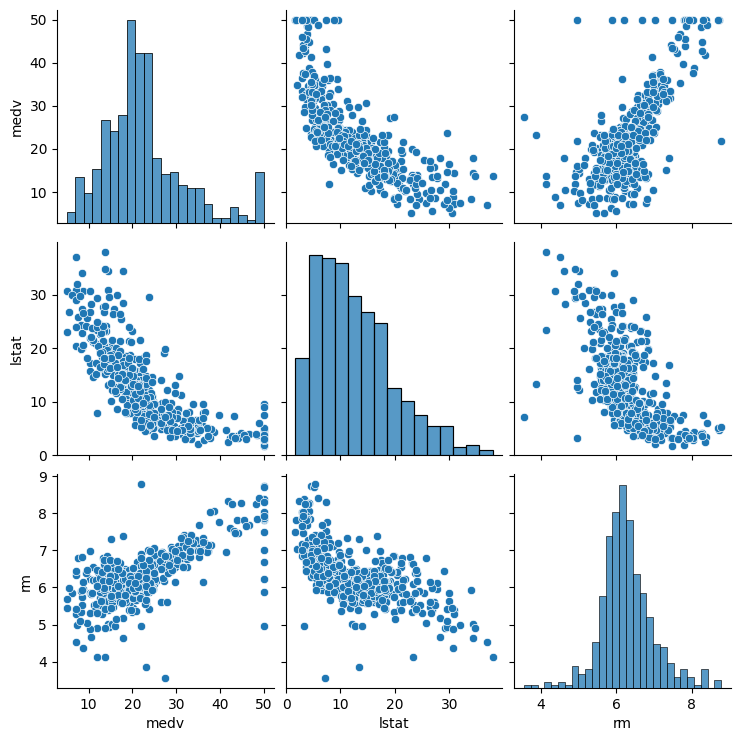

In [16]:
plt.figure(figsize = (20,14))
sns.pairplot(df[['medv', 'lstat', 'rm']])

In [87]:
x = df[['lstat','rm']]
y = df['medv']
x1 = df['rm']
x1 = np.array(x1).reshape(-1,1)
x.shape, y.shape

((506, 2), (506,))

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((404, 2), (102, 2), (404,), (102,))

In [77]:
model = LinearRegression(n_jobs = -1)

Training The Model

In [78]:
model.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

Predictions

In [79]:
y_pred = model.predict(x_test)

In [80]:
pred_df = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
print(pred_df.head())

     Actual  Predicted
118    20.4  19.031523
144    11.8   5.345869
445    11.8  16.147881
327    22.2  21.715819
381    10.9  18.453908


In [81]:
pred = model.predict(x_train)

MSE and RMSE

In [82]:
mse = mean_squared_error(y_train, pred)
math.sqrt(mse)

5.818297240000304

In [83]:
mae = mean_absolute_error(y_test, y_pred)
mae

3.3239320212633716

In [84]:
r2_score(y_train, pred)

0.6269206094928145

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: ignored

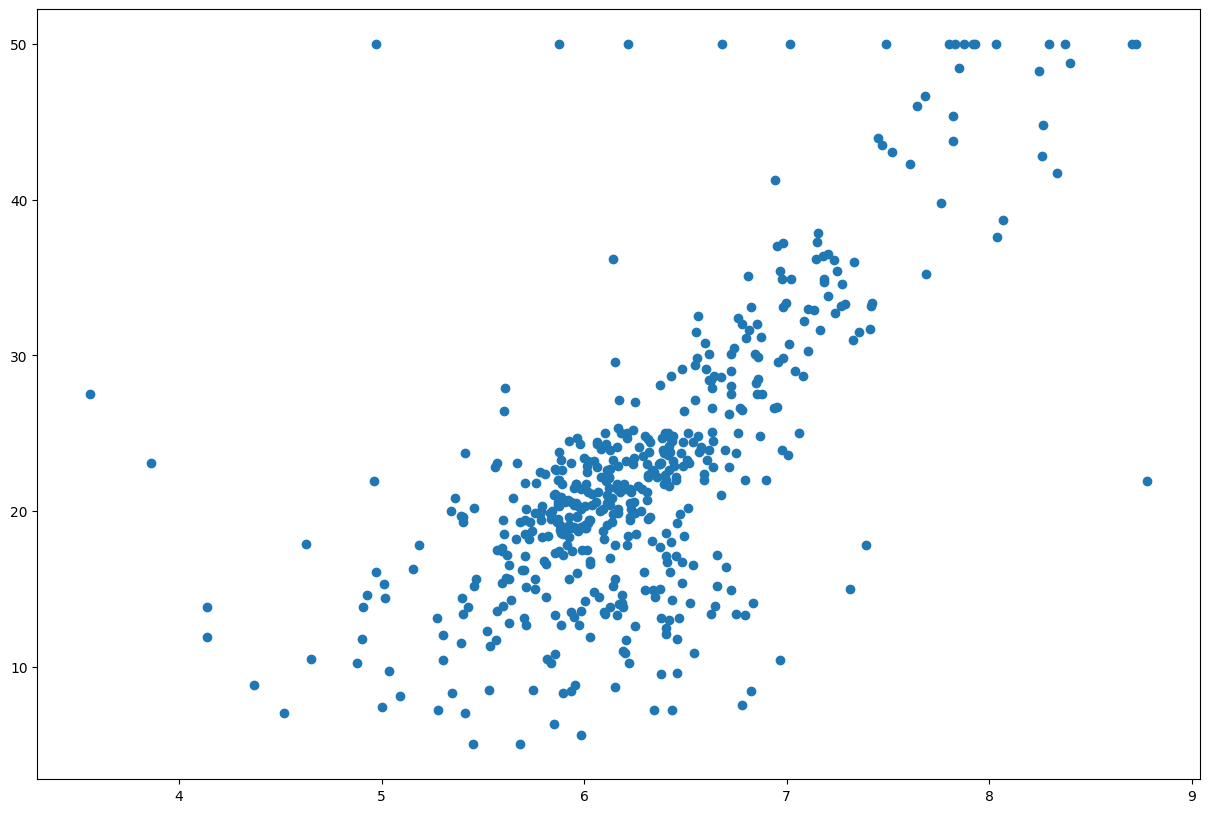

In [88]:
plt.figure(figsize = (15, 10))
pred_space = np.linspace(min(x1), max(x1)).reshape(-1,1)
plt.scatter(x1, y)
plt.plot(pred_space, model.predict(pred_space), color = 'black', linewidth = 3)
plt.show()